In [101]:
#Import scikit-learn dataset library
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import mglearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

%matplotlib inline

#Load dataset

redwine_data = pd.read_csv(r'redwine_data.csv', sep=',', index_col=0)
# Data proprocessing
features = redwine_data.iloc[:,0:11].values
labels = redwine_data.iloc[:,11].values

# print the names of the 13 features
print("Features: ", features)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", labels)

# print data(feature)shape
print("Shape:",redwine_data.shape)

Features:  [[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
Labels:  [5 5 5 ... 6 5 6]
Shape: (1599, 12)


In [102]:
X = features
Y = labels
# feature extraction
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X, Y)
# summarize scores
#np.set_printoptions(precision=3)
fit_transofrmed_features = fit.transform(X)
#print(fit.scores_)

# Get columns to keep
cols = test.get_support(indices=True)
print(cols)
# Create new dataframe with only desired columns, or overwrite existing
features_new = redwine_data.columns[cols]

# summarize selected features
print(features_new)

redwine_data_reduced = pd.DataFrame(fit_transofrmed_features, columns=features_new)
features = redwine_data_reduced.iloc[:,0:5].values

[ 1  2  5  6 10]
Index(['volatile.acidity', 'citric.acid', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'alcohol'],
      dtype='object')


In [103]:

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2,random_state=0) # 70% training and 30% test


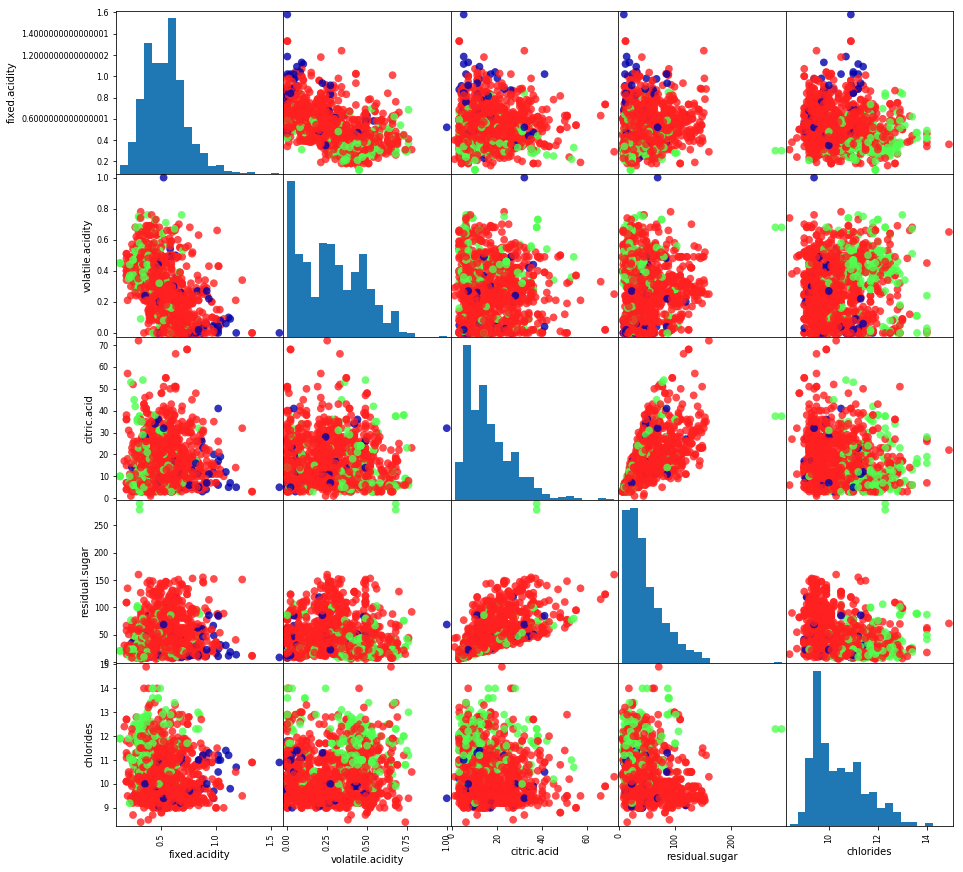

In [104]:
# Visualize data
wine_dataframe = pd.DataFrame(X_train, columns=redwine_data.columns.values[:5])
pd.plotting.scatter_matrix(wine_dataframe,c=y_train, figsize=(15,15), marker='o', hist_kwds={'bins':20}, s=60, alpha=.8,cmap=mglearn.cm3)
print('')

In [115]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0, n_estimators=30).fit(X_train, y_train)

#Predict the response for test dataset
y_pred = forest.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.653125
